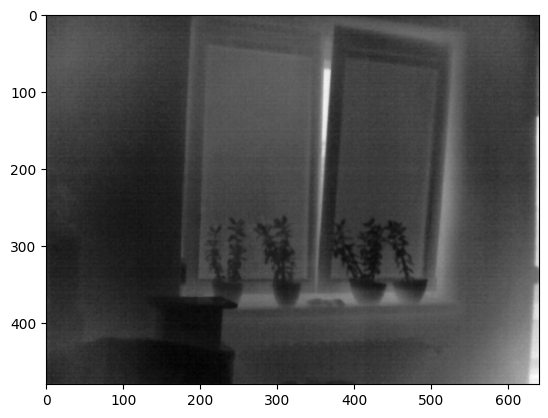

In [237]:
import cv2 as cv
import matplotlib.pyplot as plt
import weompy
import numpy as np

core = weompy.CoreManager()
core.connectUartAuto()
img = core.captureImage()
core.disconnect()
img.save("test.wti")

img = weompy.Image.load("test.wti")
img_data = np.array(img.getData())

def preprocess(image_data):
    img_data = image_data.copy()
    img_data = img_data - img_data.min()  # Normalize the image data to [0, 255]
    img_data = img_data / img_data.max()  # Normalize the image data to [0, 1]
    img_data = (img_data * 255).astype(np.float32)
    
    return img_data

image = preprocess(img_data).reshape((img.getHeight(), img.getWidth()))

plt.imshow(image, cmap="Greys")

(0.0, 16128.0)

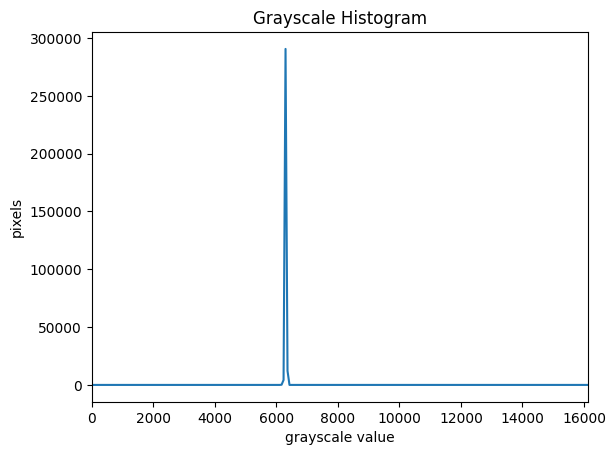

In [238]:
histogram, bins = np.histogram(img_data, bins=255, range=(0, 16383))

# n = 97
# print(histogram[n])
# print(bins[n])

# h = histogram > 0
# active_bins = bins[0:-1][h]

# print(active_bins)
# print(active_bins.max())
# print(active_bins.min())

fig, ax = plt.subplots()
ax.plot(bins[0:-1], histogram)
ax.set_title("Grayscale Histogram")
ax.set_xlabel("grayscale value")
ax.set_ylabel("pixels")
ax.set_xlim(0, 16128)
# ax.set_xlim(5000, 7000)

# idata = img_data / active_bins.max()
# idata = (idata * 255)
# idata = idata.reshape(img.getHeight(), img.getWidth())
# plt.imshow(idata, cmap="Greys")

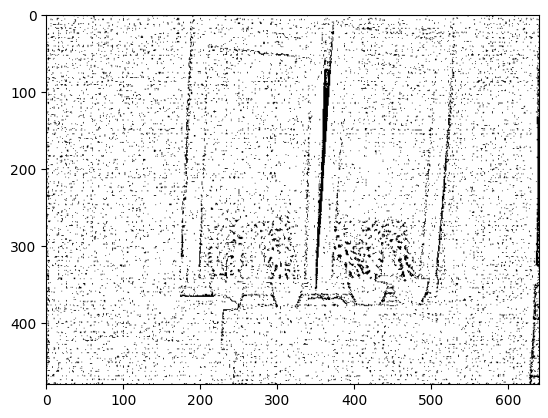

In [249]:
def run_adapth(image):
    th_image = image.copy().astype(np.uint8)
    
    th_image = cv.adaptiveThreshold(th_image, 1.8, cv.BORDER_REPLICATE, cv.THRESH_BINARY_INV, 7, 3.0)
    
    plt.imshow(th_image, cmap="Greys")

run_adapth(image)

# K-means

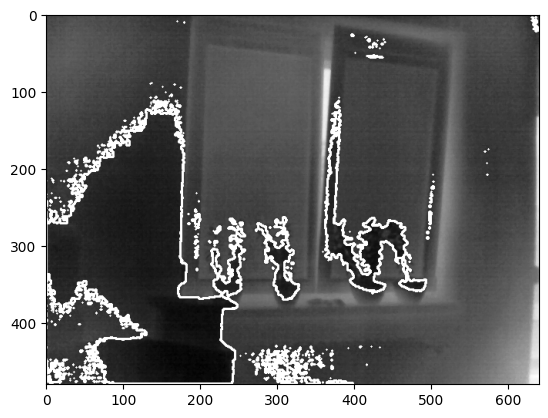

In [240]:
def run_kmeans(image, K=5):
    km_image = image.copy()
    km_image_r = km_image.reshape(-1, 1)

    criteria = (cv.TermCriteria_EPS + cv.TermCriteria_MAX_ITER, 10, 1.0)

    _, labels, centers = cv.kmeans(km_image_r, K, None, criteria, 100, cv.KMEANS_PP_CENTERS) # type: ignore

    # segmented = centers[labels.flatten()].reshape(km_image.shape).astype(np.uint8)

    hottest_cluster = np.argmax(centers)
    mask = (labels.flatten() == hottest_cluster).reshape(km_image.shape).astype(np.uint8) * 255

    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(km_image, contours, -1, (0, 0, 255), 2)  # vykresli na originál

    plt.imshow(km_image, cmap="Greys")
    
run_kmeans(image)

# DBSCAN

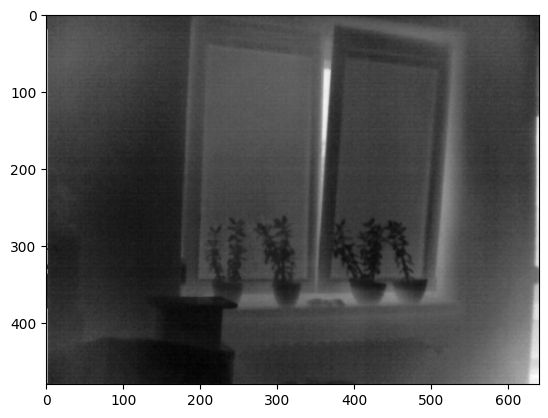

In [241]:
from sklearn.cluster import DBSCAN

def run_dbscan(image):
    dbs_image = image.copy()

    db = DBSCAN(eps=100, min_samples=5).fit(dbs_image)
    labels = db.labels_

    contours, _ = cv.findContours(labels, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
    cv.drawContours(dbs_image, contours, -1, (0, 0, 255), 2)

    plt.imshow(dbs_image, cmap="Greys")
    
run_dbscan(image)

# HDBSCAN

c:\Users\Michal\projects\XUIAL\.XUIAL310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Michal\projects\XUIAL\.XUIAL310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


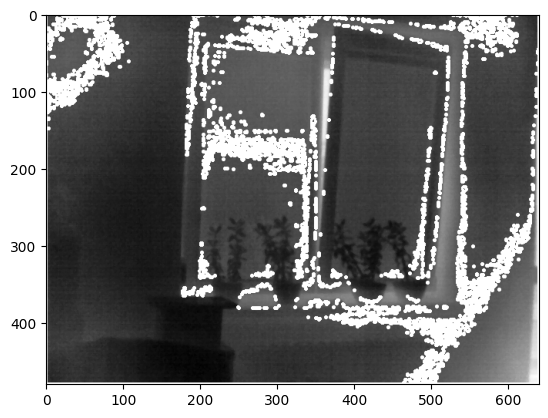

In [242]:
import hdbscan

def run_hdbscan(image):
    hdbs_image = image.copy()
    hdbs_image_r = hdbs_image.reshape(-1, 1)

    clusterer = hdbscan.HDBSCAN(min_cluster_size=50)
    labels = clusterer.fit_predict(hdbs_image_r)
    
    mask = labels.reshape(hdbs_image.shape).astype(np.uint8) * 255

    contours, _ = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
    cv.drawContours(hdbs_image, contours, -1, (0, 0, 255), 2)

    plt.imshow(hdbs_image, cmap="Greys")
    
run_hdbscan(image)